## TODO & ToC

### Take 1
1. Exploring the dataset
   1. Finding missing values, and choose how to deal with them
   2. Analyze features
   3. Descr statistics / visualize
2. Preprocessing
   1. Deal with missing values, duplicates and other bad data
   2. Feature Engineering
      1. One-hot the categoricals, and drop the originals
      2. Scale numerical features
      3. Feature creation
   3. Feature Selection
      1. metrics as: correlation, mutual information, PMI, etc
      2. drop redundant or irrelevant features
3. Dimensionality Reduction
   1. PCA or tSNE or MDS or LLE
   2. vizualize
4. Cluster
   1. k-Means & GMM
   2. find optimal k
5. Cluster analysis
   1. Descr Stats, identify key features
   2. Visualize clusters
6. Insights
   1. interpret clusters
7. Iterate and improve
   1. Evaluate quality of clusters (using metrics)
   2. Try different clustering & dimensional reduction techniques
   3. Do Feature Engineering again
   4. Finalize
8. Clean up everything, export code & visuals, write report
   
### Take 2:
1. Data Validation & Cleaning
   1. check for duplicates
   2. check & handle missing data
   3. validate distributions (histograms/boxplots): detect skews & outliers
   4. standardize into consistentency (eg consistent datetime format)
2. EDA (find patterns & relationships, skews, needed transforms etc)
   1. Descriptive stats
   2. corrleation analysis: eg heatmaps
   3. dimensionality check
   4. Visualize clusters: PCA/t-SNE for preliminary grouping
3. Feature Engineering: create more meaningfulness for clustering
   1. Normalize/Scale
   2. encode categoricals
   3. features for Time-Series
   4. Text/Image: TF-IDF, CNN, etc
   5. Transform (eg Log(), quantile, sum, etc) & Create new features
4. Dimensionality Reduction: simplify (= feature extraction) (if needed)
   1. Linear
   2. Nonlinear
   3. Autoencoders
5. Feature Selection (VarianceThreshold, SelectKBest, SHAP_after clustering)
   1. from original: drop low variance / redundant
   2. from extracted: select top PCA (eg 95% variance)
6. Clustering / Anomaly detection
   1. Clustering: Kmeans, DBSCAN, HDBSCAN, GMM
   2. or Anomaly detection
   3. VALIDATE
      1. Silhouette score
      2. Elbow method
      3. Visual checking (PCA/UMAP)
7. Interpret, profiling: explain clusters & anomalies
   1. cluster stats: mean/median of features, per group
   2. SHAP/SALib: feature importance
   3. prototype analysis: identify representative samples per cluster
8. Report, Visualize
   1. Dashboards (Plotly Dash, Tableau)
   2. Cluster profiles: tables with key stats per group
   3. Actionable recommendations
9.  Deploy & Monitor:
   1. API endpoints
   2. drift detection
   3. feedback loops


### Take 3
1. Data Cleaning:
   1. missing, duplicates, inconsitent formats, outliers, sanity checks
2. EDA
   1. basic desc stats: centrals(mean,med,mod), spread (var&IQR), shape (skew, kurt), missing & unique vals
   2. , distrib analysis, correlation analysis
   3. initial visulations: hist, box, violin, desnity, bar & multivariate
   4. potentionel issues or interesting pattersn
3. Feature Engineering
   1. create new features
   2. transform existing (eg log transf)
   3. encode categoricals
   4. create interaction terms if ncessatry
   5. time-based features
4. Feature Selection
   1. Remove redundant
   2. Statistical tests for importance
      1. Numericals: Correlation, ANOVA F, Mutual.Inf.
      2. Categoricals: X², Information Gain
      3. Variance Threshold
      4. Feature importance with simple models
   3. corellation gbased selection
   4. remove low variance features
5. Dimensionality Reduction
   1. PCA
   2. tSNE
   3. UMAP
   4. Factor analysis
6. Advanced analysis & vis
   1. final viz
   2. statistical testing
      1. Distrib tests: ShapiroW, KolSmir, And-Darl
      2. Hypoth: T, MannWhtU, KruskalWall, Wilcoxon paired
      3. Model validation: Cross-validation metrics, Residual Anal, Good-of-Fit
   3. pattern validations
   

## 1) First look at the dataset

### 1.1 imports & loading

In [1]:
# Package imports & load dataset

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# CONSTANTS
BOLD = '\033[1m'
END = '\033[0m'

df = pd.read_csv("dataset/mental-heath-in-tech-2016_20161114.csv")

### 1.2 Initial look

In [2]:
df.info()
# 1433 rows x 63 cols
# very long column names
# Several columns have null-elements, some barely have data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 63 columns):
 #   Column                                                                                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                                                                                            --------------  -----  
 0   Are you self-employed?                                                                                                                                                            1433 non-null   int64  
 1   How many employees does your company or organization have?                                                                                                                        1146 non-null   object 
 2   Is your employer primarily a tech company/organization?     

In [3]:
df.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


In [4]:
# Which columns contain missing/empty/NaN values?

print(f"{BOLD}isna() Columns:{END}")
#isna_cols = df.columns[df.isna().any()] 
#print(isna_cols)

# How many?
isna_sum = df.isna().sum()
isna_sum = isna_sum[isna_sum > 0]
print(isna_sum)

isna() Columns:
How many employees does your company or organization have?                                                                                                                           287
Is your employer primarily a tech company/organization?                                                                                                                              287
Is your primary role within your company related to tech/IT?                                                                                                                        1170
Does your employer provide mental health benefits as part of healthcare coverage?                                                                                                    287
Do you know the options for mental health care available under your employer-provided coverage?                                                                                      420
Has your employer ever formally discussed mental health (fo

In [5]:
df.select_dtypes(["object"]).nunique().sort_values(ascending=False)
# which categorical columns have many choices, sorted (desc)?

Why or why not?                                                                                                                                                                     1085
Why or why not?.1                                                                                                                                                                   1080
Which of the following best describes your work position?                                                                                                                            264
If yes, what condition(s) have you been diagnosed with?                                                                                                                              128
If so, what condition(s) were you diagnosed with?                                                                                                                                    116
If maybe, what condition(s) do you believe you have?                       

## 2) PRE-PROCESSING

### Initial preparation

#### Renaming columns

In [6]:
# RENAME columns. The names are too long to work with comfortably.
# afterwards, store a lookup table in a dictionary

# dfr: df renamed
dfr = df.rename(
    columns = {
        df.columns[0]: "self_employed",
        df.columns[1]: "n_employees", # 100 & 500 are double-counted in the categories; bins not equidistant
        df.columns[2]: "employer_is_tech",
        df.columns[3]: "your_primary_role==tech",
        df.columns[4]: "employer_provides_HC-benefits",
        df.columns[5]: "know_HC-options",
        df.columns[6]: "employer_discussed_MH",
        df.columns[7]: "employer_resources_learnMH/help",
        df.columns[8]: "anonymity_protected",
        df.columns[9]: "MH_leave",
        df.columns[10]: "neg_conseq_discus_MH_w_employer",
        df.columns[11]: "neg_conseq_discus_PH_w_employer",
        df.columns[12]: "comfy_discus_MH_w_coworkers",
        df.columns[13]: "comfy_discus_MH_w_supervisor",
        df.columns[14]: "employer:MH==PH",
        df.columns[15]: "neg_conseq_coworkers_open_MH",
        df.columns[16]: "have_coverage_for_MH",
        df.columns[17]: "know_resources_help",
        df.columns[18]: "if_MH:reveal_to_clients/contacts",
        df.columns[19]: "if_revealed_client/contact:neg_impact",
        df.columns[20]: "if_MH:reveal_to_coworkers/employees",
        df.columns[21]: "if_revealed_cowork/empl:neg_impact",
        df.columns[22]: "productivity_influ_MH",
        df.columns[23]: "ifso,%_time_affected",
        df.columns[24]: "have_previous_employers",
        df.columns[25]: "previous_emplyrs_provided_MH",
        df.columns[26]: "aware_options_MH_prev_emplyrs",
        df.columns[27]: "prev_emplyrs_discuss_MH",
        df.columns[28]: "prev_emplyrs_resources_learnMH/help",
        df.columns[29]: "prev_emplyrs_anonymity_protected",
        df.columns[30]: "neg_conseq_discus_MH_w_prev_emplyrs",
        df.columns[31]: "neg_conseq_discus_PH_w_prev_emplyrs",
        df.columns[32]: "willing_discus_MH_prev_coworkers", 
        df.columns[33]: "willing_discus_MH_prev_supervisors", #Question implies previous supervisors, but doesn't actually state it!
        df.columns[34]: "prev_emplyrs:MH==PH",
        df.columns[35]: "neg_conseq_coworkers_MH_prev_emplyrs",
        df.columns[36]: "willing_talk_PH_interview",
        df.columns[37]: "36->Why/Not",
        df.columns[38]: "willing_talk_MH_interview",
        df.columns[39]: "38->Why/Not",
        df.columns[40]: "seenas_MH_hurt_career",
        df.columns[41]: "coworkers_more_neg_if_know_MH",
        df.columns[42]: "share_MH_friends/family",
        df.columns[43]: "bad_response_MH_current/prev_emplyrs",
        df.columns[44]: "witnessed_other_thus_less_likely_emplyr", # Doesn't specify if other witnessed individual was at current workplace
        df.columns[45]: "family_history_MH",
        df.columns[46]: "MH_in_past",
        df.columns[47]: "currently_MH",
        df.columns[48]: "47->Y:Which_MH",
        df.columns[49]: "47->Maybe:Which_MH",
        df.columns[50]: "diagnose_by_professional",
        df.columns[51]: "51->which_MH",
        df.columns[52]: "sought_MH_treatment_professional",
        df.columns[53]: "if_MH:when_treated:interferes_with_work",
        df.columns[54]: "if_MH:when_not_treated_well:interferes_with_work",
        df.columns[55]: "Age",
        df.columns[56]: "Gender",
        df.columns[57]: "country_living",
        df.columns[58]: "US_state_living",
        df.columns[59]: "country_working",
        df.columns[60]: "US_state_working",
        df.columns[61]: "work_position",
        df.columns[62]: "remote_work",
       
    }
)

new_old_colnames = {new: ori for ori, new in zip(df.columns, dfr.columns)}
old_new_colnames = {val: key for key, val in new_old_colnames.items()}

# check the assignments for wrong assignment (due to manual renaming)
for i in range(63):
    # new_col_name == new_col_name
    assert old_new_colnames[df.columns[i]] == dfr.columns[i]

#### Helper function

In [7]:
def describe_cols(dataframe: pd.DataFrame, 
                  lookup: dict[str, str] | None =None, 
                  slice : list[int] | None = None
                  ) -> None:
    """Helper function, to get the essentials out of a dataframe,
    in order to facilitate Data Validation

        input: a dataframe,
            (optional) an lookup dictionary of new -> old column names
            (optional) the column indexes you request, as a list, inclusive
        return: None, only prints to console
    """
    if slice == None:
        slice = [0, len(dataframe.columns) - 1]

    if slice[1] > len(dataframe.columns) or slice[1] < 0:
        slice[1] = len(dataframe.columns) - 1
    if slice[0] < 0 or slice[0] > len(dataframe.columns) - 1:
        slice[0] = 0
    sl_range = range(slice[0], slice[1] + 1)

    df_length = len(dataframe)

    for i, col in enumerate(dataframe.columns):
        if i not in sl_range:
            continue
        
        print(f"{BOLD}col #{i}, name: {col}{END}") # header
        try:
            print(f"{BOLD}original name:{END} {lookup[col]}")
        except KeyError as e:
            pass

        print(f"{BOLD}dtype:{END} {dataframe[col].dtype}")
        print(f"{BOLD}isna:{END} {dataframe[col].isna().sum()} \
              (= {100*dataframe[col].isna().sum() / df_length:.1f}%)") # % pct
        print(f"{BOLD}unique:{END} ", dataframe[col].unique()) \
            if dataframe[col].dtype == 'object' else None
        #print(f"duplicates {dataframe.duplicated()}")
        
        print(f"{30 * "- "}") # --------------- divider
        
        print(dataframe[col].describe())
        
        print(f"{79*'#'}") # ############### divider

In [8]:
# testing & showing the function
describe_cols(dfr, new_old_colnames, [0,1])

col #0, name: self_employed
original name: Are you self-employed?
dtype: int64
isna: 0               (= 0.0%)
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
count    1433.000000
mean        0.200279
std         0.400349
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: self_employed, dtype: float64
###############################################################################
col #1, name: n_employees
original name: How many employees does your company or organization have?
dtype: object
isna: 287               (= 20.0%)
unique:  ['26-100' '6-25' nan 'More than 1000' '100-500' '500-1000' '1-5']
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
count       1146
unique         6
top       26-100
freq         292
Name: n_employees, dtype: object
###############################################################################


#### Cucconi test, to be removed

In [9]:
from scipy.stats import norm, rankdata

def cucconi_test(data1, data2=None, group_col=None, value_col=None):
    """
    Robust Cucconi test for Pandas, handling ties and edge cases.
    
    Args:
        data1: Series/array or DataFrame (if group/value_col provided).
        data2: Second Series/array (if data1 is not a DataFrame).
        group_col: Column name in DataFrame defining groups.
        value_col: Column name in DataFrame with numeric values.
        
    Returns:
        dict: statistic, p_value, interpretation.
              Returns None if inputs are invalid.
    """
    # Process DataFrame input
    if group_col is not None and value_col is not None:
        groups = data1[group_col].unique()
        if len(groups) != 2:
            raise ValueError("Exactly 2 groups required.")
        x = data1[data1[group_col] == groups[0]][value_col].dropna().values
        y = data1[data1[group_col] == groups[1]][value_col].dropna().values
    # Process Series/array input
    else:
        if data2 is None:
            raise ValueError("data2 must be provided if not using group/value_col.")
        x = pd.Series(data1).dropna().values
        y = pd.Series(data2).dropna().values
    
    n, m = len(x), len(y)
    if n < 5 or m < 5:
        return {"statistic": None, "p_value": None, 
                "interpretation": "Sample too small (n < 5)"}
    
    # Rank combined data (handle ties with midranks)
    combined = np.concatenate([x, y])
    ranks = rankdata(combined, method='average')
    ranks_x, ranks_y = ranks[:n], ranks[n:]
    
    # Compute U (location) and V (scale)
    U = np.sum(ranks_x) - n * (n + m + 1) / 2
    V = np.sum(ranks_x**2) - n * (n + m + 1) * (2*(n + m) + 1) / 6
    
    # Expected values and variances
    var_U = n * m * (n + m + 1) / 12
    var_V = n * m * (n + m + 1) * (2*(n + m) + 1) * (8*(n + m) + 11) / 180
    cov_UV = n * m * (n + m + 1) * (2*(n + m) + 1) * (n + m + 2) / 180
    
    # Standardize U and V (avoid division by zero)
    U_star = (U - 0) / np.sqrt(var_U) if var_U > 0 else 0
    V_star = (V - n * (n + m + 1) * (2*(n + m) + 1) / 6 + n * (n + m + 1)**2 / 4) / np.sqrt(var_V) if var_V > 0 else 0
    
    # Compute Cucconi statistic (guard against numerical instability)
    rho = cov_UV / np.sqrt(var_U * var_V) if (var_U > 0 and var_V > 0) else 0
    rho = np.clip(rho, -0.999, 0.999)  # Prevent division by zero in C
    C = (U_star**2 + V_star**2 - 2 * rho * U_star * V_star) / (1 - rho**2) if (1 - rho**2) > 1e-10 else 0
    
    # Ensure C is non-negative (due to floating-point errors)
    C = max(0, C)
    p_value = 1 - norm.cdf(np.sqrt(C)) if not np.isnan(C) else np.nan
    
    return {
        "statistic": C,
        "p_value": p_value,
        "interpretation": "Reject H0 (distributions differ)" if p_value < 0.05 
                         else "Fail to reject H0" if not np.isnan(p_value) 
                         else "Test failed (check inputs or sample sizes)"
    }

### further Data Validation & Data Cleaning

In [10]:
# Make copies
df_original = df.copy() # keep the original df
dfr_original = dfr.copy() # keep the original renamed df, for lookups

dfr_cleaned = dfr.copy() # work in this one

# we will make/work in 'dfr_cleaned'

#### Cols 0-10

##### Read

In [11]:
#describe_cols(dfr_original, new_old_colnames, [0,10])

#describe_cols(dfr_original, new_old_colnames, [0,1])
#describe_cols(dfr_original, new_old_colnames, [2,2])
#describe_cols(dfr_original, new_old_colnames, [3,4])
#describe_cols(dfr_original, new_old_colnames, [5,6])
#describe_cols(dfr_original, new_old_colnames, [7,8])
describe_cols(dfr_original, new_old_colnames, [9,10])

col #9, name: MH_leave
original name: If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:
dtype: object
isna: 287               (= 20.0%)
unique:  ['Very easy' 'Somewhat easy' 'Neither easy nor difficult' nan
 'Very difficult' 'Somewhat difficult' "I don't know"]
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
count              1146
unique                6
top       Somewhat easy
freq                281
Name: MH_leave, dtype: object
###############################################################################
col #10, name: neg_conseq_discus_MH_w_employer
original name: Do you think that discussing a mental health disorder with your employer would have negative consequences?
dtype: object
isna: 287               (= 20.0%)
unique:  ['No' 'Maybe' nan 'Yes']
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
count      1146
unique        3
top       Maybe
freq        487
Name: neg_conseq_discus_MH_w_employer

##### Amend TODO: COL 5

In [12]:
## This column is validated & amended first, as it will be used for 
# hypothesis testing when in doubt in further columns

#### COL 55 ###################################################################
# name: Age
# some weird values: 3, 15, 17, 99, 323
col = "Age"

dfr_cleaned.loc[dfr_cleaned[col] < 18, ['Age']] # 3, 15, 17 are underage, likely not employed
dfr_cleaned.loc[dfr_cleaned[col] > 65, ['Age']] # 66, 70, 74, 99, 323
# let's drop the underage, and the 99 and 323-year olds values.
if col in dfr_cleaned.columns and any(dfr_cleaned[col] < 18):
    dfr_cleaned = dfr_cleaned.drop(dfr_cleaned[dfr_cleaned[col] < 18].index)
if col in dfr_cleaned.columns and any(dfr_cleaned[col] >= 99):
    dfr_cleaned = dfr_cleaned.drop(dfr_cleaned[dfr_cleaned[col] >= 99].index)
#dfr_cleaned.Age.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 286 entries, 3 to 1429
Data columns (total 63 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   self_employed                                     286 non-null    int64  
 1   n_employees                                       0 non-null      object 
 2   employer_is_tech                                  0 non-null      float64
 3   your_primary_role==tech                           0 non-null      float64
 4   employer_provides_HC-benefits                     0 non-null      object 
 5   know_HC-options                                   0 non-null      object 
 6   employer_discussed_MH                             0 non-null      object 
 7   employer_resources_learnMH/help                   0 non-null      object 
 8   anonymity_protected                               0 non-null      object 
 9   MH_leave                 

C:\Users\patrick\AppData\Local\Temp\ipykernel_24616\1128416977.py:86: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = dfr_cleaned.groupby('age_group').apply(
C:\Users\patrick\AppData\Local\Temp\ipykernel_24616\1128416977.py:87: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  lambda g: stats.mannwhitneyu(
C:\Users\patrick\AppData\Local\Temp\ipykernel_24616\1128416977.py:86: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence t

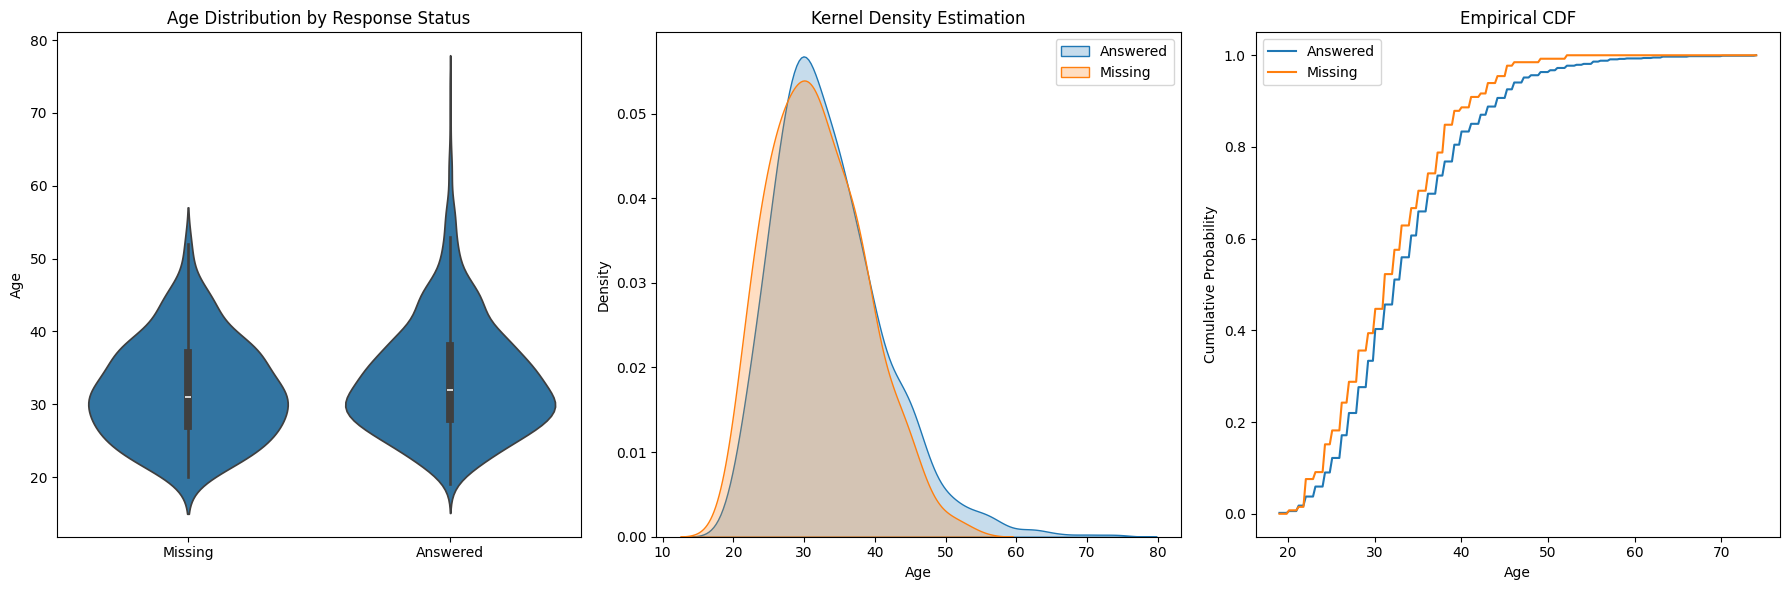

Permutation p-value: 0.0148, Effect size: -1.70 years
Permutation p-value: 0.4440, Effect size: -1.00 years


In [13]:
# Columns 0-10

### Col 0 #####################################################################
# name: self_employed
# original name: Are you self-employed?
col = "self_employed"
if col in dfr_cleaned.columns:
    dfr_cleaned[col].value_counts(normalize=True, dropna=False)
# This column will get dropped in the next section, as it brings no value
# to a company, which does typically not employ self-employed.

### Col 1 #####################################################################
# col #1, name: n_employees
# original name: How many employees does your company or organization have?
# isna: 287 (=20%)
# problems: 
# - double counting of the boundaries 100, 500
# - category bins are of vastly different sizes/ranges
col = "n_employees"
dfr_cleaned[col].value_counts(normalize=True, dropna=False)
dfr_cleaned[col].isna().sum() # 287 nan, all of them from "self_employed"

if "self_employed" in dfr_cleaned.columns:
    dfr_cleaned[(dfr_cleaned["self_employed"] == 1) & (dfr_cleaned["n_employees"].isna())].info()
# so all nulls are the self-employed, and they also null in other columns
# --> drop self-employed rows & drop self_employed column

# drop self-employed rows & drop self_employed column
col = "self_employed"
if col in dfr_cleaned.columns and any(dfr_cleaned[col] == 1):
    dfr_cleaned = dfr_cleaned.drop(dfr_cleaned[dfr_cleaned[col] == 1].index)
    dfr_cleaned = dfr_cleaned.drop(col, axis = 1)

# check column again
col = "n_employees"
dfr_cleaned[col].isna().sum() # no more isna
dfr_cleaned[col].value_counts(normalize=True, dropna=False)

# except for the mentioned problems with the bin sizes and double counting,
# all is fine for use


### Col 2 #####################################################################
# name: employer_is_tech
# isna: 287 (=20%)
# but will be solved after dropping 'self_employed'
col = "employer_is_tech"
#dfr_cleaned[col].info()
#dfr_cleaned[col].isna().sum()
dfr_cleaned[col] = dfr_cleaned[col].astype(int)
dfr_cleaned[col].value_counts(dropna=False)

### Col 3 #####################################################################
# name: your_primary_role==tech
# original name: Is your primary role within your company related to tech/IT?
# isna: 1170 (= 82%)
### way too many isna. Drop column
col = "your_primary_role==tech"
if col in dfr_cleaned.columns:
    dfr_cleaned = dfr_cleaned.drop(col, axis=1)

### Col 4 #####################################################################
# name: employer_provides_HC-benefits
# isna: 287 (=20%) = the self-employed -> are dropped later
col = "employer_provides_HC-benefits"
#dfr_cleaned[col].value_counts(dropna=False)

# TODO: SOLVE THIS
### Col 5 #####################################################################
# name: know_HC-options
# original name: Do you know the options for mental health care available under your employer-provided coverage?
# isna: 420               (= 29.3%)
col = "know_HC-options"
dfr_cleaned[col].value_counts(dropna=False, normalize=True)
dfr_cleaned[dfr_cleaned[col].isna()]["Age"].mean()
dfr_cleaned[~dfr_cleaned[col].isna()]["Age"].mean()

res = stats.mannwhitneyu(dfr_cleaned[dfr_cleaned[col].isna()]["Age"], dfr_cleaned[~dfr_cleaned[col].isna()]["Age"])
print(res)



# -------

dfr_cleaned['age_group'] = pd.cut(dfr_cleaned['Age'], bins=[18,30,45,60,100])
grouped = dfr_cleaned.groupby('age_group').apply(
    lambda g: stats.mannwhitneyu(
        g[g[col].isna()]['Age'],
        g[~g[col].isna()]['Age'],
        nan_policy='omit'
    ).pvalue
)
print("Stratified p-values:\n", grouped)
# ---------
#from statsmodels.stats.power import TTestIndPower
#analysis = TTestIndPower()
#power = analysis.solve_power(effect_size=d, nobs1=len(dfr_cleaned[dfr_cleaned[col].isna()]["Age"]), alpha=0.05)
#print(f"Power: {power:.2f}")  # If <0.8, results are underpowered
# --------
trim_diff = stats.trim_mean(dfr_cleaned[dfr_cleaned[col].isna()]["Age"], 0.1) - stats.trim_mean(dfr_cleaned[~dfr_cleaned[col].isna()]["Age"], 0.1)
print(f"10% trimmed mean difference: {trim_diff:.1f} years")

# ------
from statsmodels.distributions.empirical_distribution import ECDF

# Prepare data
answered = dfr_cleaned[~dfr_cleaned[col].isna()]["Age"].dropna()
missing = dfr_cleaned[dfr_cleaned[col].isna()]["Age"].dropna()

# Create figure
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Violin plot
sns.violinplot(x=np.where(dfr_cleaned[col].isna(), "Missing", "Answered"), 
                y=dfr_cleaned["Age"], ax=ax1)
ax1.set_title("Age Distribution by Response Status")
ax1.set_ylabel("Age")

# KDE plot
sns.kdeplot(answered, label="Answered", ax=ax2, fill=True)
sns.kdeplot(missing, label="Missing", ax=ax2, fill=True)
ax2.set_title("Kernel Density Estimation")
ax2.set_xlabel("Age")
ax2.legend()

# eCDF plot
ecdf_answered = ECDF(answered)
ecdf_missing = ECDF(missing)
x = np.linspace(min(min(answered), min(missing)), max(max(answered), max(missing)), 200)
ax3.plot(x, ecdf_answered(x), label='Answered')
ax3.plot(x, ecdf_missing(x), label='Missing')
ax3.set_title("Empirical CDF")
ax3.set_xlabel("Age")
ax3.set_ylabel("Cumulative Probability")
ax3.legend()

plt.tight_layout()
plt.show()


### ----
def permutation_test(x, y, n_permutations=10_000, test_stat='mean'):
    """More robust permutation test implementation"""
    # Convert to arrays
    x, y = np.array(x), np.array(y)
    
    # Calculate observed difference
    if test_stat == 'mean':
        obs_diff = np.mean(x) - np.mean(y)
    elif test_stat == 'median':
        obs_diff = np.median(x) - np.median(y)
    
    # Pool data
    combined = np.concatenate([x, y])
    
    # Initialize
    perm_diffs = np.zeros(n_permutations)
    
    # Permutation loop
    for i in range(n_permutations):
        np.random.shuffle(combined)
        perm_x = combined[:len(x)]
        perm_y = combined[len(x):]
        
        if test_stat == 'mean':
            perm_diffs[i] = np.mean(perm_x) - np.mean(perm_y)
        elif test_stat == 'median':
            perm_diffs[i] = np.median(perm_x) - np.median(perm_y)
    
    # Calculate p-value (two-tailed)
    pval = (np.abs(perm_diffs) >= np.abs(obs_diff)).mean()
    
    return pval, obs_diff

# Usage
pval, effect = permutation_test(missing, answered, test_stat='mean')
print(f"Permutation p-value: {pval:.4f}, Effect size: {effect:.2f} years")
pval, effect = permutation_test(missing, answered, test_stat='median')
print(f"Permutation p-value: {pval:.4f}, Effect size: {effect:.2f} years")


### Col 6 #####################################################################
# name: employer_discussed_MH
# original name: Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
# isna: 287 (= 20%) -> these will be gone after dropping col 'self_employed'
# everything fine
col = "employer_discussed_MH"
#dfr_cleaned[col].value_counts(dropna=False)

### Col 7 #####################################################################
# name: employer_resources_learnMH/help
# isna: 287 (= 20%) -> These will be gone after dropping col 'self_employed'
# everything fine
col = "employer_resources_learnMH/help"
#dfr_cleaned[col].value_counts(dropna=False)

### Col 8 #####################################################################
# name: anonymity_protected
# isna: 287 (= 20%) -> These will be gone after dropping col 'self_employed'
# all OK
col = "anonymity_protected"
#dfr_cleaned[col].value_counts(dropna=False)

### Col 9 #####################################################################
# name: MH_leave
# isna: 287 (= 20%) -> These will be gone after dropping col 'self_employed'
# all OK
col = "MH_leave"
#dfr_cleaned[col].value_counts(dropna=False)

### Col 10 ####################################################################
# name: neg_conseq_discus_MH_w_employer
# isna: 287 (= 20%) -> These will be gone after dropping col 'self_employed'
# all OK
col = "neg_conseq_discus_MH_w_employer"
#dfr_cleaned[col].value_counts(dropna=False)



In [14]:
%%script false --no-raise-error

# Check integrity of datatypes & values (redundant entries, etc)

v_err = "Column ID and name don't match"
# LOOKING AT EACH COLUMN/FEATURE
# -----------------------------------------------------------------------------
# col 0: self_employed
# Are you self-employed?'
# dtype: int (boolean) -> OK
# ---------------------------------------
#
#
#dfr.iloc[:,0].unique() # 0,1 : 1146 not SE, 287 SE: 80% not SE, 20% SE
#  
# -----------------------------------------------------------------------------
# col 1: n_employees
# How many employees does your company or organization have?'
# dtype: string/object (category)
# ---------------------------------------
#
#
#dfr.iloc[:,1].value_counts() # 100, 500 are counted twice in the categories
#dfr.iloc[:,1].isna().sum() # 287 nan, all of them from "self_employed"
#dfr[dfr.iloc[:,1].isna()].info()

#dfr[(dfr['self_employed'] == 1) & (dfr['n_employees'].isna())].info() # proof that all nulls are the self-employed

filt = (dfr['self_employed'] == 1) & (dfr['n_employees'].isna());
dfr.loc[filt, 'n_employees'] = "Other (e.g. self-employed)";
filt = None

# problems: 
# - double counting of the boundaries 100, 500
# - category bins are of vastly different sizes/ranges
#dfr.iloc[:,1].value_counts()
#
# -----------------------------------------------------------------------------
# col 2: employer_is_tech
# 'Is your employer primarily a tech company/organization?'
# now: dtype: float (bool)
# will become: object (category)
# ---------------------------------------
#
#dfr.iloc[:,2].unique()
#dfr.iloc[:,2].value_counts() # floats, not integers
#dfr[dfr.iloc[:,2].isna()].info()
#dfr[(dfr['self_employed'] == 1) & (dfr['employer_is_tech'].isna())].info();
#dfr[dfr['employer_is_tech'].isna()].info()

# Turn this binary/bool 1/0 column into a categorical column
dfr['employer_is_tech'] = dfr[['employer_is_tech']].replace({1.0: 'yes', 0.0: 'no'})
dfr['employer_is_tech'] = dfr[['employer_is_tech']].fillna('unknown')
#dfr.iloc[:,2].info()
#dfr['employer_is_tech'].unique()
#dfr['employer_is_tech'].isna().sum()
#
# -----------------------------------------------------------------------------
# col 3: your_primary_role==tech
# 'Is your primary role within your company related to tech/IT?'
# dtype: float (boolean)
# should be converted to int, after removing NaN's
# only 263/1433 respondents = 18%
# To do: hypothesis testing on a few columns to see whether the respondents
# and non-respondents differ. 

# Cucconi-test was custom-implemented for this purpose, but later discarded.
# TODO: once enough data cleaning is done, redo the hypothesis test
# to gain proper results.
# ---------------------------------------
#
#dfr.iloc[:, 3].unique() # nan, 1.0, 0.0
#dfr.iloc[:, 3].value_counts() # 248 x 1.0; 15 x 0.0 = 263 total
#dfr.iloc[:, 3].isna().sum() # 1170
# Too much data is missing. Do inferential stats to check similarity
# with non-respondents

dfr['your_primary_role==tech'].describe()
filled_in = dfr[dfr['your_primary_role==tech'].notna()]
not_filled = dfr[dfr['your_primary_role==tech'].isna()]

# histogram
plt.figure(figsize=(10, 6))
sns.histplot(filled_in['Age'], color='blue', label='Filled', kde=True)
sns.histplot(not_filled['Age'], color='red', label="Didn't fill ", kde=True)
plt.legend()
plt.title('Age Distribution: Filled vs Not-filled in')
plt.xlim(0,100)
plt.axvline(filled_in['Age'].mean(), color='blue', linestyle='--', label=f'Filled Mean: {filled_in["Age"].mean():.1f}')
plt.axvline(not_filled['Age'].mean(), color='red', linestyle='--', label=f'Missing Mean: {not_filled["Age"].mean():.1f}')
plt.show()

from scipy.stats import ttest_ind, mannwhitneyu
t_stat, p_value = ttest_ind(filled_in['Age'], not_filled['Age'], nan_policy='omit')
print(f"(age) T-test p-value: {p_value}")

stat, p_value = mannwhitneyu(filled_in['Age'], not_filled['Age'], nan_policy='omit', alternative='two-sided')
print(f"(age) Mann-Whitney p-value: {p_value}")

from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(dfr['your_primary_role==tech'].notna(), dfr['Gender'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print(f"(gender) Chi-square p-value: {p_value}")

# -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --

print(f"{70*'-'}")
print("PERMUTATION (diff of means) (age)")

observed_diff = np.mean(filled_in['Age']) - np.mean(not_filled['Age'])
combined = np.concatenate([filled_in['Age'], not_filled['Age']])

n_permutations = 1_000
perm_diff = np.zeros(n_permutations)

for i in range(n_permutations):
    np.random.shuffle(combined)
    perm_filled_in = combined[:len(filled_in['Age'])]
    perm_not_filled = combined[len(filled_in['Age']):]
    perm_diff[i] = np.mean(perm_filled_in) - np.mean(perm_not_filled)
p_val = ((np.abs(perm_diff)) >= np.abs(observed_diff)).mean()
print(f"permutation p-value: {p_val:.4f}")
# -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
"""
print("BOOTSTRAP")
n_bootstraps = 50_000
boot_diff = np.zeros(n_bootstraps)

for i in range(n_bootstraps):
    # Resample each group with replacement
    boot_filled = np.random.choice(filled_in['Age'], size=len(filled_in['Age']), replace=True)
    boot_not_filled = np.random.choice(not_filled['Age'], size=len(not_filled['Age']), replace=True)
    boot_diff[i] = np.mean(boot_filled) - np.mean(boot_not_filled)

# 95% Confidence Interval
ci_low, ci_high = np.percentile(boot_diff, [2.5, 97.5])
print(f"Bootstrap 95% CI for mean difference: [{ci_low:.2f}, {ci_high:.2f}]")"
"""
#------------
# density plot
sns.histplot(
    data=dfr, x='Age', hue=dfr['your_primary_role==tech'].isna(),
    kde=True, stat='density', common_norm=False
)
plt.xlim(0,100)
plt.axvline(filled_in['Age'].mean(), color='blue', linestyle='--', label=f'Filled Mean: {filled_in["Age"].mean():.1f}')
plt.axvline(not_filled['Age'].mean(), color='red', linestyle='--', label=f'Missing Mean: {not_filled["Age"].mean():.1f}')
plt.show()

#-------
sns.ecdfplot(data=dfr, x='Age', hue=dfr['your_primary_role==tech'].isna(), stat='proportion')
plt.xlim(0,100)
plt.axvline(filled_in['Age'].mean(), color='blue', linestyle='--', label=f'Filled Mean: {filled_in["Age"].mean():.1f}')
plt.axvline(not_filled['Age'].mean(), color='red', linestyle='--', label=f'Missing Mean: {not_filled["Age"].mean():.1f}')
plt.show()


# --------
"""
print("Bayes")
import pymc as pm  # Note: Just 'pymc' now, not 'pymc3'
import arviz as az

# Prepare data
filled_in_B = dfr[dfr['your_primary_role==tech'].notna()]['Age'].dropna().values
not_filled_B = dfr[dfr['your_primary_role==tech'].isna()]['Age'].dropna().values

with pm.Model() as model:
    # Priors (uninformative)
    mu_filled = pm.TruncatedNormal("mu_filled", mu=30, sigma=20, lower=0)
    mu_not_filled = pm.TruncatedNormal("mu_not_filled", mu=30, sigma=20, lower=0)
    sigma = pm.Exponential("sigma", lam=1/10) 
    
    # Likelihood
    pm.Normal("filled_data", mu=mu_filled, sigma=sigma, observed=filled_in_B)
    pm.Normal("not_filled_data", mu=mu_not_filled, sigma=sigma, observed=not_filled_B)
    
    # Difference between means
    diff_means = pm.Deterministic("diff_means", mu_filled - mu_not_filled)
    
    # Sample (PyMC v5 syntax)
    idata = pm.sample(draws=2000, tune=1000, cores=6)

# Plot results
az.plot_posterior(idata, var_names=["diff_means"], ref_val=0)
print(f"Probability filled_in > not_filled: {np.mean(idata.posterior['diff_means'] > 0):.3f}")
az.summary(idata, var_names=["diff_means"])

""";
#print(filled_in.describe())
#print(not_filled.describe())

#sns.pairplot(filled_in)
#sns.pairplot(not_filled)
#plt.show()
print(f"{filled_in['Age'].var()} {not_filled['Age'].var()}")
print("\n")
print("VARIANCE TESTS:")
print("* Levene'test of variance (mean): (for age)")
stat, p_val = stats.levene(filled_in['Age'], not_filled['Age'], center='mean')
print(f"{stat=} {p_val=}")

print("* Brown-Forsythe test of variance (median): (for age)")
stat, p_val = stats.levene(filled_in['Age'], not_filled['Age'], center='median')
print(f"{stat=} {p_val=}")

print("\n")
print("ECDF tests:")
print("* Kolmogorov-Smirnov 2 sample test (H°: same distrib) (for age)")
from scipy.stats import ks_2samp
D, p_value = ks_2samp(filled_in['Age'], not_filled['Age'])
print(f"{D=}, {p_value=}")

print("* Anderson-Darling k-Samples (age)")
res = stats.anderson_ksamp([filled_in['Age'], not_filled['Age']])
#res.statistics, res.pvalue
print(f"{res.statistic=}, {res.pvalue=}")
print("now with permutation:")
method = stats.PermutationMethod(n_resamples=1_000)
res = stats.anderson_ksamp([filled_in['Age'], not_filled['Age']], method=method)
print(f"{res.statistic=}, {res.pvalue=}")


# -----------------------------------------------------------------------------
# col 4: 'employer_provides_HC-benefits'
# 'Does your employer provide mental health benefits as part of healthcare coverage?'
# dtype: object (categ)
# 287 nan & 1146 values
# unique: ['Not eligible for coverage / N/A', 'No', nan, 'Yes',"I don't know"]
# ---------------------------------------
print(f"{40*'- '}")

select_col = 4
df.columns[select_col], dfr.columns[select_col]

df.columns[select_col] # old column name
dfr.columns[select_col] # new col name
col = 'employer_provides_HC-benefits' # manual input for double-checking

dfr.iloc[:,select_col].info()
dfr.iloc[:, select_col].value_counts()
dfr.iloc[:, select_col].unique()
dfr.iloc[:, select_col].isna().sum()

replace_dic = {
    'Not eligible for coverage / N/A' : 'Other/Unknown/NA',
    "I don't know" : 'Other/Unknown/NA',}
dfr[col] = dfr[[col]].replace(replace_dic)
dfr[col] = dfr[[col]].fillna('Other/Unknown/NA')

print(dfr[col].value_counts())

select_col, col = None, None
replace_dic = {}
#
# -----------------------------------------------------------------------------
# col 5: 'know_HC-options'
# 'Do you know the options for mental health care available under your employer-provided coverage?'
# dtype: object (categ)
# unique:([nan, 'Yes', 'I am not sure', 'No'], dtype=object),
# isna: 420 / 1433 = 29%
# TODO: imputing values or dropping isna
# ---------------------------------------
print(f"{40*'- '}")

select_col = 5
df.columns[select_col], dfr.columns[select_col]

df.columns[select_col] # old column name
dfr.columns[select_col] # new col name
col = 'know_HC-options' # manual input for double-checking

dfr.iloc[:,select_col].info()
dfr.iloc[:, select_col].value_counts()
dfr.iloc[:, select_col].unique()
dfr.iloc[:, select_col].isna().sum()


# dfr[col] = dfr[[col]].fillna('Other/Unknown/NA')

print(dfr[col].value_counts())

select_col, col = None, None


# -----------------------------------------------------------------------------
# col 6: 'employer_discussed_MH'
# 'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
# unique: array(['No', 'Yes', nan, "I don't know"]
# isna: 287 
# TODO: imputing values or dropping isna
# ---------------------------------------
#
print(f"{40*'- '}")

select_col = 6
df.columns[select_col], dfr.columns[select_col]

df.columns[select_col] # old column name
dfr.columns[select_col] # new col name
col = 'employer_discussed_MH' # manual input for double-checking
if col != dfr.columns[select_col]:
    raise ValueError(v_err)

dfr.iloc[:,select_col].info()
dfr.iloc[:, select_col].value_counts()
dfr.iloc[:, select_col].unique()
dfr.iloc[:, select_col].isna().sum()


# dfr[col] = dfr[[col]].fillna('Other/Unknown/NA')

print(dfr[col].value_counts())

select_col, col = None, None

#
# -----------------------------------------------------------------------------
# col 7: 'employer_resources_learnMH/help'
# Does your employer offer resources to learn more about mental health concerns and options for seeking help?'
# unique:'No', 'Yes', nan, "I don't know"
# isna: 287
# ---------------------------------------
#
#
print(f"{40*'- '}")

select_col = 7
df.columns[select_col], dfr.columns[select_col]

df.columns[select_col] # old column name
dfr.columns[select_col] # new col name
col = 'employer_resources_learnMH/help' # manual input for double-checking
if col != dfr.columns[select_col]:
    raise ValueError(v_err)

dfr.iloc[:,select_col].info()
dfr.iloc[:, select_col].value_counts()
dfr.iloc[:, select_col].unique()
dfr.iloc[:, select_col].isna().sum()


# dfr[col] = dfr[[col]].fillna('Other/Unknown/NA')

print(dfr[col].value_counts())

select_col, col = None, None
#
# -----------------------------------------------------------------------------
# col 8: 'anonymity_protected'
# Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
# dtype: obj (categ)
# unique: "I don't know", 'Yes', nan, 'No'
# isna: 287
# ---------------------------------------
print(f"{40*'- '}")

select_col = 8
df.columns[select_col], dfr.columns[select_col]

df.columns[select_col] # old column name
dfr.columns[select_col] # new col name
col = 'anonymity_protected' # manual input for double-checking
if col != dfr.columns[select_col]:
    raise ValueError(v_err)

dfr.iloc[:,select_col].info()
dfr.iloc[:, select_col].value_counts()
dfr.iloc[:, select_col].unique()
dfr.iloc[:, select_col].isna().sum()


# dfr[col] = dfr[[col]].fillna('Other/Unknown/NA')

print(dfr[col].value_counts())

select_col, col = None, None

#
# -----------------------------------------------------------------------------
# col 9: 'MH_leave'
# 'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:'
# dtype: obj (categ)
# unique: ['Very easy', 'Somewhat easy', 'Neither easy nor difficult', nan,
#        'Very difficult', 'Somewhat difficult', "I don't know"]
# isna: 287
# ---------------------------------------
#
#
print(f"{40*'- '}")

select_col = 9
df.columns[select_col], dfr.columns[select_col]

df.columns[select_col] # old column name
dfr.columns[select_col] # new col name
col = 'MH_leave' # manual input for double-checking
if col != dfr.columns[select_col]:
    raise ValueError(v_err)
print(f"{select_col=} : {df.columns[select_col]}")

dfr.iloc[:,select_col].info()
dfr.iloc[:, select_col].value_counts()
dfr.iloc[:, select_col].unique()
dfr.iloc[:, select_col].isna().sum()


# dfr[col] = dfr[[col]].fillna('Other/Unknown/NA')

print(dfr[col].value_counts())

select_col, col = None, None

# -----------------------------------------------------------------------------
# col 10: 'neg_conseq_discus_MH_w_employer'
# 'Do you think that discussing a mental health disorder with your employer would have negative consequences?'
# dtype: obj (categ)
# unique: ['No', 'Maybe', nan, 'Yes'],
# isna: 287
# ---------------------------------------
#
#
print(f"{40*'- '}")

select_col = 10
df.columns[select_col], dfr.columns[select_col]

df.columns[select_col] # old column name
dfr.columns[select_col] # new col name
col = 'neg_conseq_discus_MH_w_employer' # manual input for double-checking
if col != dfr.columns[select_col]:
    raise ValueError(v_err)
print(f"{select_col=} : {df.columns[select_col]}")

dfr.iloc[:,select_col].info()
dfr.iloc[:, select_col].value_counts()
dfr.iloc[:, select_col].unique()
dfr.iloc[:, select_col].isna().sum()


# dfr[col] = dfr[[col]].fillna('Other/Unknown/NA')

print(dfr[col].value_counts())

select_col, col = None, None

##### END OF FIRST 10 COLS
print("-- 10 cols done")

Couldn't find program: 'false'


#### Cols 11-20

##### Read

In [15]:
describe_cols(dfr_original, new_old_colnames, [11,20])

#describe_cols(dfr_original, new_old_colnames, [11,12])
#describe_cols(dfr_original, new_old_colnames, [13,14])
#describe_cols(dfr_original, new_old_colnames, [15,16])
#describe_cols(dfr_original, new_old_colnames, [17,18])
#describe_cols(dfr_original, new_old_colnames, [19,20])

col #11, name: neg_conseq_discus_PH_w_employer
original name: Do you think that discussing a physical health issue with your employer would have negative consequences?
dtype: object
isna: 287               (= 20.0%)
unique:  ['No' nan 'Maybe' 'Yes']
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
count     1146
unique       3
top         No
freq       837
Name: neg_conseq_discus_PH_w_employer, dtype: object
###############################################################################
col #12, name: comfy_discus_MH_w_coworkers
original name: Would you feel comfortable discussing a mental health disorder with your coworkers?
dtype: object
isna: 287               (= 20.0%)
unique:  ['Maybe' nan 'Yes' 'No']
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
count      1146
unique        3
top       Maybe
freq        479
Name: comfy_discus_MH_w_coworkers, dtype: object
###############################################################################
col #13, name: com

##### Amend

In [16]:
## COL 11-20

### COL 11 ####################################################################
#name: neg_conseq_discus_PH_w_employer
# isna: 287 (= 20%) -> will be solved after dropping 'self_employed'
# all is fine
col = "neg_conseq_discus_PH_w_employer"
#dfr_cleaned[col].value_counts(dropna=False)

### COL 12 ####################################################################
# name: comfy_discus_MH_w_coworkers
# isna: 287 (= 20%) -> will be solved after dropping 'self_employed'
# all is ok
col = "comfy_discus_MH_w_coworkers"
#dfr_cleaned[col].value_counts(dropna=False)

### COL 13 ####################################################################
# name: comfy_discus_MH_w_supervisor
# isna: 287 (= 20%) -> will be solved after dropping 'self_employed'
# all OK
col = "comfy_discus_MH_w_supervisor"
dfr_cleaned[col].value_counts(dropna=False)

### COL 14 ####################################################################
# name: employer:MH==PH
# isna: 287 (= 20%) -> will be solved after dropping 'self_employed'
# all OK
col = "employer:MH==PH"
dfr_cleaned[col].value_counts(dropna=False)

### COL 15 ####################################################################
# name: neg_conseq_coworkers_open_MH
# isna: 287 (= 20%) -> will be solved after dropping 'self_employed'
col = "neg_conseq_coworkers_open_MH"
#dfr_cleaned[col].value_counts(dropna=False)
#dfr_cleaned[col].unique() # categorical, not int

### COL 16 ####################################################################
# name: have_coverage_for_MH
# isna: 1146 (= 80%)
col = "have_coverage_for_MH"
if col in dfr_cleaned.columns:
    dfr_cleaned[col].isna().sum() # still 1142 isna -> drop column
if col in dfr_cleaned.columns:
    dfr_cleaned = dfr_cleaned.drop(col, axis = 1)

### COL 17 ####################################################################
# name: know_resources_help
# isna: 1146 (= 80%)
col = "know_resources_help"
if col in dfr_cleaned.columns:
    dfr_cleaned[col].isna().sum() # still 1142 isna -> drop column
if col in dfr_cleaned.columns:
    dfr_cleaned = dfr_cleaned.drop(col, axis = 1)

### COL 18 ####################################################################
# name: if_MH:reveal_to_clients/contacts
# isna: 1146 (= 80%)
col = "if_MH:reveal_to_clients/contacts"
dfr_cleaned[col].info() # still 1142 isna -> drop column

### COL 19 ####################################################################
# name: if_revealed_client/contact:neg_impact
# isna: 1289 (= 90%) --> way too many, drop column
col = "if_revealed_client/contact:neg_impact"
if col in dfr_cleaned.columns:
    dfr_cleaned = dfr_cleaned.drop(col, axis = 1)

### COL 20 ####################################################################
# name: if_MH:reveal_to_coworkers/employees
# isna: 1146 (= 80%) --> too many, drop column
col = "if_MH:reveal_to_coworkers/employees"
if col in dfr_cleaned.columns:
    dfr_cleaned = dfr_cleaned.drop(col, axis = 1)

<class 'pandas.core.series.Series'>
Index: 1142 entries, 0 to 1432
Series name: if_MH:reveal_to_clients/contacts
Non-Null Count  Dtype 
--------------  ----- 
0 non-null      object
dtypes: object(1)
memory usage: 17.8+ KB


In [17]:
%%script false --no-raise-error

# COLS 11 - 20


# -----------------------------------------------------------------------------
# col 11: 'neg_conseq_discus_PH_w_employer'
#Do you think that discussing a physical health issue with your employer would have negative consequences?'
# isna: 287
#
print(f"{40*'- '}")

select_col = 11
df.columns[select_col], dfr.columns[select_col]

df.columns[select_col] # old column name
dfr.columns[select_col] # new col name
col = 'neg_conseq_discus_PH_w_employer' # manual input for double-checking
if col != dfr.columns[select_col]:
    raise ValueError(v_err)
print(f"{select_col=} : {df.columns[select_col]=}")

dfr.iloc[:,select_col].info()
dfr.iloc[:, select_col].value_counts()
dfr.iloc[:, select_col].unique()
dfr.iloc[:, select_col].isna().sum()


# dfr[col] = dfr[[col]].fillna('Other/Unknown/NA')

print(dfr[col].value_counts())

select_col, col = None, None

# -----------------------------------------------------------------------------
# col 12: 'comfy_discus_MH_w_coworkers'
# Would you feel comfortable discussing a mental health disorder with your coworkers?'
# dtype: obj (categ)
# unique: ['Maybe', nan, 'Yes', 'No']
# isna: 287
# ---------------------------------------
print(f"{40*'- '}")

select_col = 12
df.columns[select_col], dfr.columns[select_col]

df.columns[select_col] # old column name
dfr.columns[select_col] # new col name
col = 'comfy_discus_MH_w_coworkers' # manual input for double-checking
if col != dfr.columns[select_col]:
    raise ValueError(v_err)
print(f"{select_col=} : {df.columns[select_col]=}")

dfr.iloc[:,select_col].info()
dfr.iloc[:, select_col].value_counts()
dfr.iloc[:, select_col].unique()
dfr.iloc[:, select_col].isna().sum()


# dfr[col] = dfr[[col]].fillna('Other/Unknown/NA')

print(dfr[col].value_counts())

select_col, col = None, None


# -----------------------------------------------------------------------------
# col 13
# 
# dtype
# unique
# isna
# ---------------------------------------
#
#
# -----------------------------------------------------------------------------
# col 14
# 
# dtype
# unique
# isna
# ---------------------------------------
#
#
# -----------------------------------------------------------------------------
# col 15
# 
# dtype
# unique
# isna
# ---------------------------------------
#
#
# -----------------------------------------------------------------------------
# col 16
# 
# dtype
# unique
# isna
# ---------------------------------------
#
#
# -----------------------------------------------------------------------------
# col 17
# 
# dtype
# unique
# isna
# ---------------------------------------
#
#
# -----------------------------------------------------------------------------
# col 18
# 
# dtype
# unique
# isna
# ---------------------------------------
#
#
# -----------------------------------------------------------------------------
# col 19
# 
# dtype
# unique
# isna
# ---------------------------------------
#
#
# -----------------------------------------------------------------------------
# col 20
# 
# dtype
# unique
# isna
# ---------------------------------------
#
#

##### END OF 20 COLS
print("-- 20 cols done")



Couldn't find program: 'false'


In [18]:
selcol = 12
df.columns[selcol], dfr.columns[selcol], dfr.iloc[:,selcol].info(), dfr.iloc[:, selcol].value_counts(), dfr.iloc[:, selcol].unique(), dfr.iloc[:, selcol].isna().sum()

<class 'pandas.core.series.Series'>
RangeIndex: 1433 entries, 0 to 1432
Series name: comfy_discus_MH_w_coworkers
Non-Null Count  Dtype 
--------------  ----- 
1146 non-null   object
dtypes: object(1)
memory usage: 11.3+ KB


('Would you feel comfortable discussing a mental health disorder with your coworkers?',
 'comfy_discus_MH_w_coworkers',
 None,
 comfy_discus_MH_w_coworkers
 Maybe    479
 No       392
 Yes      275
 Name: count, dtype: int64,
 array(['Maybe', nan, 'Yes', 'No'], dtype=object),
 np.int64(287))

#### Cols 21-30

##### Read

In [19]:
describe_cols(dfr_original, new_old_colnames, [21,30])

#describe_cols(dfr_original, new_old_colnames, [21,22])
#describe_cols(dfr_original, new_old_colnames, [23,24])
#describe_cols(dfr_original, new_old_colnames, [25,26])
#describe_cols(dfr_original, new_old_colnames, [27,28])
#describe_cols(dfr_original, new_old_colnames, [29,30])

col #21, name: if_revealed_cowork/empl:neg_impact
original name: If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?
dtype: object
isna: 1146               (= 80.0%)
unique:  [nan "I'm not sure" 'No' 'Yes' 'Not applicable to me']
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
count                      287
unique                       4
top       Not applicable to me
freq                       133
Name: if_revealed_cowork/empl:neg_impact, dtype: object
###############################################################################
col #22, name: productivity_influ_MH
original name: Do you believe your productivity is ever affected by a mental health issue?
dtype: object
isna: 1146               (= 80.0%)
unique:  [nan 'Yes' 'Not applicable to me' 'No' 'Unsure']
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
count     287
unique      4
top       Yes
freq      204
Name: productivity_influ_MH, d

##### Amend (todo Col 28)

In [20]:
#### COL 21 ###################################################################
# name: if_revealed_cowork/empl:neg_impact
# as 80% is N/A, we will drop this column
col = "if_revealed_cowork/empl:neg_impact"
if col in dfr_cleaned.columns:
  dfr_cleaned = dfr_cleaned.drop(col, axis = 1)

#### COL 22 ###################################################################
# name: productivity_influ_MH
# as 80% is N/A, we will drop this column
col = "productivity_influ_MH"
if col in dfr_cleaned.columns:
  dfr_cleaned = dfr_cleaned.drop(col, axis = 1)

#### COL 23 ###################################################################
# name: ifso,%_time_affected
# as 86% is N/A, we will drop this column
col = "ifso,%_time_affected"
if col in dfr_cleaned.columns:
  dfr_cleaned = dfr_cleaned.drop(col, axis = 1)

#### COL 24 ###################################################################
# name: have_previous_employers
# Everything fine.

#### COL 25 ###################################################################
# name: previous_emplyrs_provided_MH
# isna: 169 (= 12%)
# We will combine isna with "I don't know" (=22%), combined = (33.6%)
col = "previous_emplyrs_provided_MH"
dfr_cleaned[col] = (dfr_cleaned[col]
                                               .fillna('Unknown')
                                               .replace("I don't know","Unknown")
                                               )
#dfr_cleaned["previous_emplyrs_provided_MH"].value_counts(normalize=True, dropna=False)

#### COL 26 ###################################################################
# name: aware_options_MH_prev_emplyrs
# isna: 169 (= 12%)
# We will combine isna with 'N/A (not currently aware)' (=41%), combined = (53%)

col = "aware_options_MH_prev_emplyrs"
dfr_cleaned[col] = (dfr_cleaned[col]
                                               .fillna('Unknown')
                                               .replace("N/A (not currently aware)","Unknown")
                                               )
#dfr_cleaned[col].value_counts(normalize=True, dropna=False)

#### COL 27 ###################################################################
# name: prev_emplyrs_discuss_MH
# isna: 169 (= 12%)
# We will combine isna with "I don't know" () (=6%), combined = (18%)
col = "prev_emplyrs_discuss_MH"
#dfr[col].value_counts(normalize=True, dropna=False)
dfr_cleaned[col] = (dfr_cleaned[col]
                                               .fillna('Unknown')
                                               .replace("I don't know","Unknown")
                                               )
#dfr_cleaned[col].value_counts(normalize=True, dropna=False)


# TODO: FINISH THE ANALYSIS HERE
#### COL 28 ###################################################################
# name: prev_emplyrs_resources_learnMH/help
# isna: 169 (= 12%)
col = "prev_emplyrs_resources_learnMH/help"
#dfr[col].value_counts(normalize=True, dropna=False)
## As it is 12% of values, and it can't be combined with an other "Unknown"
## category, another approach is needed.

# look if there is a difference in the numerical columns, in the rows which are isna
# or which are not isna
print(dfr.groupby(dfr[col].isna()).mean(numeric_only=True))
# there is a difference in the numerical columns.
# we must decide wether this difference is significant or not
# therefore: hypothesis testing
#
# if there is a significant difference, it is unlikely to be MCAR
# but is probably MNAR OR MAR


#dfr_cleaned[col] = (dfr[col]
 #                                              .fillna('Unknown')
#                                               .replace("I don't know","Unknown")
  #                                             )
#dfr_cleaned[col].value_counts(normalize=True, dropna=False)



# -----------------------------------------------------------------------------
# begin
# -----------------------------------------------------------------------------

## However, the age column hasn't been cleaned yet! 

# TODO: run again after all columns have been cleaned for more truthful results
testcol = "Age"
dfr['is_missing'] = dfr[col].isna()
group1 = dfr[dfr['is_missing']][testcol].dropna()
group2 = dfr[~dfr['is_missing']][testcol].dropna()


# Shapiro Wilk:
print(stats.shapiro(group1), stats.shapiro(group2))

# Levene's test (H°: equal variance)
_, p_value = stats.levene(group1, group2)
print(f"Levene's p-value: {p_value:.4f}")  # p < 0.05 → reject H0 (heteroscedasticity)
# with uncleaned data: p-val is 0.47 -> h° -> equal variance
# Thus, t-test will be fine to use now

_, p_value = stats.ttest_ind(group1, group2, equal_var=True)
print(f"Student t: {p_value:.3}")
# Student t: 1.54e-05 -> different distribution

_, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')
print(f"Mann-Whitney p-value: {p_value:.3}")
# Mann-Whitney p-value: 1.36e-12 -> different distribution

# -----------------------------------------------------------------------------
# end
# -----------------------------------------------------------------------------

#### COL 29 ###################################################################
# name: prev_emplyrs_anonymity_protected
# isna: 169 (= 12%)
col = "prev_emplyrs_anonymity_protected"
# dfr[col].value_counts(normalize=True, dropna=False)

# I don't know    0.600140
# NaN             0.117934
# Yes, always     0.114445
# No              0.084438
# Sometimes       0.083043

dfr_cleaned[col] = (dfr_cleaned[col]
                                               .fillna('Unknown')
                                               .replace("I don't know","Unknown")
                                               )

#dfr_cleaned[col].value_counts(normalize=True, dropna=False)



#### COL 30 ###################################################################
# name: neg_conseq_discus_MH_w_prev_emplyrs
# isna: 169 (= 12%)
col = "neg_conseq_discus_MH_w_prev_emplyrs"
#dfr[col].value_counts(normalize=True, dropna=False)
# Some of them        0.429170
# I don't know        0.216329
# Yes, all of them    0.157711
# NaN                 0.117934
# None of them        0.078856
dfr_cleaned[col] = (dfr_cleaned[col]
                                               .fillna('Unknown')
                                               .replace("I don't know","Unknown")
                                               )
#dfr_cleaned[col].value_counts(normalize=True, dropna=False)

                                     self_employed  employer_is_tech  \
prev_emplyrs_resources_learnMH/help                                    
False                                     0.196994          0.776355   
True                                      0.224852          0.725191   

                                     your_primary_role==tech  \
prev_emplyrs_resources_learnMH/help                            
False                                               0.947137   
True                                                0.916667   

                                     have_coverage_for_MH  \
prev_emplyrs_resources_learnMH/help                         
False                                            0.654618   
True                                             0.578947   

                                     have_previous_employers  \
prev_emplyrs_resources_learnMH/help                            
False                                                    1.0   
True             

test Mermaid markdown
```mermaid
flowchart LR

A[Hard] -->|Text| B(Round)
B --> C{Decision}
C -->|One| D[Result 1]
C -->|Two| E[Result 2]
```

``` mermaid
flowchart LR
  A[Start] --> B{Are missingness and observed data associated?}
  B -->|Yes| C[MAR: Use multiple imputation or include missingness flags ,MCAR ruled out]
  B -->|No| D{Does domain knowledge suggest MNAR?}
  D -->|Yes| E[MNAR: Use selection models or sensitivity analysis]
  D -->|No| F[Assume MCAR: Impute or keep as category]
  ```


r
test


In [21]:
# check for significance for MNAR



# sensitivy analy
#print(dfr['previous_emplyrs_provided_MH'].unique())

# Scenario 1: Assume all missing values = "No" (worst-case)
dfr_cleaned.loc[dfr_cleaned['previous_emplyrs_provided_MH'].isna(), 'temp_imputed_MH'] = "No, none did"

# Scenario 2: Assume all missing values = "Yes" (best-case)
dfr_cleaned.loc[dfr_cleaned['previous_emplyrs_provided_MH'].isna(), 'temp_imputed_MH'] = "Yes, they all did"

# Compare results between scenarios
print(dfr_cleaned['temp_imputed_MH'].value_counts(normalize=True))


###########################

# Scenario 1: Assume missing = worst-case (e.g., "No" for mental health support)
dfr_cleaned['temp_MH_imputed_MNAR_low(isna=No)'] = dfr_cleaned['previous_emplyrs_provided_MH'].fillna("No, none did")

# Scenario 2: Assume missing = best-case (e.g., "Yes")
dfr_cleaned['temp_MH_imputed_MNAR_high(isna=Yes)'] = dfr_cleaned['previous_emplyrs_provided_MH'].fillna("Yes, they all did")

# Compare results
print("MNAR Sensitivity Results:")
print(dfr_cleaned[['temp_MH_imputed_MNAR_low(isna=No)', 'temp_MH_imputed_MNAR_high(isna=Yes)']].apply(pd.Series.value_counts, normalize=True, dropna=False))
# if big movements, and big changes, conclusions which could be influenced ---> MNAR likely

Series([], Name: proportion, dtype: float64)
MNAR Sensitivity Results:
                   temp_MH_imputed_MNAR_low(isna=No)  \
Unknown                                     0.340630   
Some did                                    0.282837   
No, none did                                0.244308   
Yes, they all did                           0.132224   

                   temp_MH_imputed_MNAR_high(isna=Yes)  
Unknown                                       0.340630  
Some did                                      0.282837  
No, none did                                  0.244308  
Yes, they all did                             0.132224  


#### Cols 31-40

##### Read

In [22]:
describe_cols(dfr_original, new_old_colnames, [31,40])

#describe_cols(dfr_original, new_old_colnames, [31,32])
#describe_cols(dfr_original, new_old_colnames, [33,34])
#describe_cols(dfr_original, new_old_colnames, [35,36])
#describe_cols(dfr_original, new_old_colnames, [37,38])
#describe_cols(dfr_original, new_old_colnames, [39,40])

col #31, name: neg_conseq_discus_PH_w_prev_emplyrs
original name: Do you think that discussing a physical health issue with previous employers would have negative consequences?
dtype: object
isna: 169               (= 11.8%)
unique:  ['None of them' 'Some of them' 'Yes, all of them' nan]
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
count             1264
unique               3
top       Some of them
freq               631
Name: neg_conseq_discus_PH_w_prev_emplyrs, dtype: object
###############################################################################
col #32, name: willing_discus_MH_prev_coworkers
original name: Would you have been willing to discuss a mental health issue with your previous co-workers?
dtype: object
isna: 169               (= 11.8%)
unique:  ['Some of my previous employers' 'No, at none of my previous employers'
 'Yes, at all of my previous employers' nan]
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
count                          

##### Amend

In [23]:
#### COL 31 ###################################################################
# name: neg_conseq_discus_PH_w_prev_emplyrs
# isna: 169 (= 12%)

col = "neg_conseq_discus_PH_w_prev_emplyrs"
#dfr[col].value_counts(normalize=True, dropna=False)
dfr_cleaned[col] = (dfr_cleaned[col].fillna('Unknown'))
#dfr_cleaned[col].value_counts(normalize=True, dropna=False)

#### COL 32 ###################################################################
# name: willing_discus_MH_prev_coworkers
# isna: 169 (= 12%)
col = "willing_discus_MH_prev_coworkers"
#dfr[col].value_counts(normalize=True, dropna=False)
dfr_cleaned[col] = (dfr_cleaned[col].fillna('Unknown'))
#dfr_cleaned[col].value_counts(normalize=True, dropna=False)

#### COL 33 ###################################################################
# name: willing_discus_MH_prev_supervisors
# isna: 169 (= 12%)
col = "willing_discus_MH_prev_supervisors"
#dfr[col].value_counts(normalize=True, dropna=False)
dfr_cleaned[col] = (dfr_cleaned[col]
                                               .fillna('Unknown')
                                               .replace("I don't know","Unknown")
                                               )
#dfr_cleaned[col].value_counts(normalize=True, dropna=False)

#### COL 34 ###################################################################
# name: prev_emplyrs:MH==PH
# isna: 169 (= 12%)
col = "prev_emplyrs:MH==PH"
#dfr[col].value_counts(normalize=True, dropna=False)
dfr_cleaned[col] = (dfr_cleaned[col]
                                               .fillna('Unknown')
                                               .replace("I don't know","Unknown")
                                               )
#dfr_cleaned[col].value_counts(normalize=True, dropna=False)

#### COL 35 ###################################################################
# name: neg_conseq_coworkers_MH_prev_emplyrs
# isna: 169 (= 12%)
col = "neg_conseq_coworkers_MH_prev_emplyrs"
#dfr[col].value_counts(normalize=True, dropna=False)
dfr_cleaned[col] = dfr_cleaned[col].fillna('Unknown')
#dfr_cleaned[col].value_counts(normalize=True, dropna=False)

#### COL 36 ###################################################################
# name: willing_talk_PH_interview
# all OK
col = "willing_talk_PH_interview"
#dfr_cleaned[col] = dfr[col]
#dfr_cleaned[col].value_counts(normalize=True, dropna=False)

#### COL 37 ###################################################################
# name: name: 36->Why/Not
# isna: 338 (= 24%)
col = "36->Why/Not"
#dfr[col].value_counts(normalize=True, dropna=False)
# useless column, there are way too many different answers. use TF-IDF perhaps
# -> we will drop it.
if col in dfr_cleaned.columns:
    dfr_cleaned = dfr_cleaned.drop(col, axis = 1)

#### COL 38 ###################################################################
# name: willing_talk_MH_interview
# everything fine.
col = "willing_talk_MH_interview"
#dfr[col].value_counts(normalize=True, dropna=False)
#dfr_cleaned[col] = dfr[col]

#### COL 39 ###################################################################
# name: 38->Why/Not
col = "38->Why/Not"
#dfr[col].value_counts(normalize=True, dropna=False)
#dfr[col].nunique()
# useless column, there are way too many different answers. use TF-IDF perhaps
# -> we will drop it.
if col in dfr_cleaned.columns:
    dfr_cleaned = dfr_cleaned.drop(col, axis = 1)

#### COL 40 ###################################################################
# name: seenas_MH_hurt_career
# ori: Do you feel that being identified as a person with a mental health issue 
# would hurt your career?
# ---> ca 9.3% has MH, and has an answer based on experience
# ---> ca 50% is conjecturing
#
col = "seenas_MH_hurt_career"
#dfr[col].value_counts(normalize=True, dropna=False)
#dfr_cleaned[col] = dfr[col]
#dfr_cleaned[col].value_counts(normalize=True, dropna=False)


#### Cols 41-50

##### Read

In [24]:
describe_cols(dfr_original, new_old_colnames, [41,50])

#describe_cols(dfr_original, new_old_colnames, [41,42])
#describe_cols(dfr_original, new_old_colnames, [43,44])
#describe_cols(dfr_original, new_old_colnames, [45,46])
#describe_cols(dfr_original, new_old_colnames, [47,48])
#describe_cols(dfr_original, new_old_colnames, [49,50])
#describe_cols(dfr_original, new_old_colnames, [50,50])

col #41, name: coworkers_more_neg_if_know_MH
original name: Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?
dtype: object
isna: 0               (= 0.0%)
unique:  ["No, I don't think they would" 'Maybe' 'Yes, they do'
 'Yes, I think they would' 'No, they do not']
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
count      1433
unique        5
top       Maybe
freq        591
Name: coworkers_more_neg_if_know_MH, dtype: object
###############################################################################
col #42, name: share_MH_friends/family
original name: How willing would you be to share with friends and family that you have a mental illness?
dtype: object
isna: 0               (= 0.0%)
unique:  ['Somewhat open' 'Neutral'
 'Not applicable to me (I do not have a mental illness)' 'Very open'
 'Not open at all' 'Somewhat not open']
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
count  

##### Amend

In [25]:
#### COL 41 ##################################################################
# name: coworkers_more_neg_if_know_MH
# fine, do nothing
col = "coworkers_more_neg_if_know_MH"
#dfr[col].value_counts(normalize=True, dropna=False)
#dfr_cleaned[col] = dfr[col]
#dfr_cleaned[col].value_counts(normalize=True, dropna=False)

#### COL 42 ##################################################################
# name: share_MH_friends/family
# fine, do nothing
col = "share_MH_friends/family"
#dfr[col].value_counts(normalize=True, dropna=False)
#dfr_cleaned[col] = dfr[col]

#### COL 43 ##################################################################
# name: bad_response_MH_current/prev_emplyrs
# isna: 89 (=6%)
col = "bad_response_MH_current/prev_emplyrs"
#dfr[col].value_counts(normalize=True, dropna=False)
dfr_cleaned[col] = (dfr_cleaned[col]
                                               .fillna('Unsure/Unknown')
                                               .replace("Maybe/Not sure","Unsure/Unknown")
                                               )
#dfr_cleaned[col].value_counts(normalize=True, dropna=False)

#### COL 44 ##################################################################
# name: witnessed_other_thus_less_likely_emplyr
# isna: 776 (= 54%)
# --> too many isna, drop column
col = "witnessed_other_thus_less_likely_emplyr"
if col in dfr_cleaned.columns:
    dfr_cleaned = dfr_cleaned.drop(col, axis = 1)

#### COL 45 ##################################################################
# name: family_history_MH
# do nothing, everything fine
col = "family_history_MH"
#dfr[col].value_counts(normalize=True, dropna=False)
#dfr_cleaned[col] = dfr[col]
#dfr_cleaned[col].value_counts(normalize=True, dropna=False)

#### COL 46 ##################################################################
# name: MH_in_past
# everything OK, do nothing
col = "MH_in_past"
#dfr[col].value_counts(normalize=True, dropna=False)
#dfr_cleaned[col] = dfr[col]
#dfr_cleaned[col].value_counts(normalize=True, dropna=False)

#### COL 47 ##################################################################
# name: currently_MH
# all ok, do nothing
col = "currently_MH"
#dfr[col].value_counts(normalize=True, dropna=False)
#dfr_cleaned[col] = dfr[col]
#dfr_cleaned[col].value_counts(normalize=True, dropna=False)

#### COL 48 ##################################################################
#name: 47->Y:Which_MH
# isna: 865 (= 60.4%)
# 128 unique values.
# --> drop the column
col = "47->Y:Which_MH"
if col in dfr_cleaned.columns:
    dfr_cleaned = dfr_cleaned.drop(col, axis = 1)

#### COL 49 ##################################################################
# name: 47->Maybe:Which_MH
# isna: 1111 (= 77.5%)
# drop column
col = "47->Maybe:Which_MH"
if col in dfr_cleaned.columns:
    dfr_cleaned = dfr_cleaned.drop(col, axis = 1)

#### COL 50 ##################################################################
# name: diagnose_by_professional
# everything fine
col = "diagnose_by_professional"
#dfr_cleaned[col] = dfr[col]

#### Cols 51-62

##### Read

In [26]:
describe_cols(dfr_original, new_old_colnames, [51,62])

#describe_cols(dfr_original, new_old_colnames, [51,52])
#describe_cols(dfr_original, new_old_colnames, [53,54])
#describe_cols(dfr_original, new_old_colnames, [55,56])
#describe_cols(dfr_original, new_old_colnames, [57,58])
#describe_cols(dfr_original, new_old_colnames, [59,60])
#describe_cols(dfr_original, new_old_colnames, [61,62])

col #51, name: 51->which_MH
original name: If so, what condition(s) were you diagnosed with?
dtype: object
isna: 722               (= 50.4%)
unique:  ['Anxiety Disorder (Generalized, Social, Phobia, etc)'
 'Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)'
 nan
 'Anxiety Disorder (Generalized, Social, Phobia, etc)|Substance Use Disorder'
 'Mood Disorder (Depression, Bipolar Disorder, etc)'
 'Anxiety Disorder (Generalized, Social, Phobia, etc)|Obsessive-Compulsive Disorder'
 'Personality Disorder (Borderline, Antisocial, Paranoid, etc)|Attention Deficit Hyperactivity Disorder'
 'Mood Disorder (Depression, Bipolar Disorder, etc)|Attention Deficit Hyperactivity Disorder|Post-traumatic Stress Disorder'
 'Anxiety Disorder (Generalized, Social, Phobia, etc)|Mood Disorder (Depression, Bipolar Disorder, etc)|Substance Use Disorder|Addictive Disorder'
 'Anxiety Disorder (Generalized, Social, Phobia, etc)|Attention Deficit Hyperactivity Disord

##### Amend COL59 TODO FEATURE ENGINEERING

In [27]:
#### COL 51 ###################################################################
# name: 51->which_MH
# isna: 722 (= 50.4%)
# --> drop 
col = "51->which_MH"
#dfr_cleaned[col]
if col in dfr_cleaned.columns:
    dfr_cleaned = dfr_cleaned.drop(col, axis = 1)

#### COL 52 ###################################################################
# name: sought_MH_treatment_professional
# binary, everything fine
# all OK
col = "sought_MH_treatment_professional"
#dfr_cleaned[col] = dfr[col]

#### COL 53 ###################################################################
# name: if_MH:when_treated:interferes_with_work
# all OK
col = "if_MH:when_treated:interferes_with_work"
#dfr[col].value_counts(normalize=True, dropna=False)
#dfr_cleaned[col] = dfr[col]
#dfr_cleaned[col].value_counts(normalize=True, dropna=False)

#### COL 54 ###################################################################
# name: if_MH:when_not_treated_well:interferes_with_work
# all OK
col = "if_MH:when_not_treated_well:interferes_with_work"
#dfr[col].value_counts(normalize=True, dropna=False)
#dfr_cleaned[col] = dfr[col]
#dfr_cleaned[col].value_counts(normalize=True, dropna=False)

#### COL 55 ###################################################################
# name: Age
# some weird values: 3, 15, 17, 99, 323
col = "Age"

dfr_cleaned.loc[dfr_cleaned[col] < 18, ['Age']] # 3, 15, 17 are underage, likely not employed
dfr_cleaned.loc[dfr_cleaned[col] > 65, ['Age']] # 66, 70, 74, 99, 323
# let's drop the underage, and the 99 and 323-year olds values.
if col in dfr_cleaned.columns and any(dfr_cleaned[col] < 18):
    dfr_cleaned = dfr_cleaned.drop(dfr_cleaned[dfr_cleaned[col] < 18].index)
if col in dfr_cleaned.columns and any(dfr_cleaned[col] >= 99):
    dfr_cleaned = dfr_cleaned.drop(dfr_cleaned[dfr_cleaned[col] >= 99].index)
#dfr_cleaned.Age.describe()



#### COL 56 ###################################################################
# name: Gender
# isna: 3 (= 0.2%)
dfr_cleaned["Gender"] = dfr_cleaned.Gender.replace({
    'M':'Male',
    'm':'Male',
    'f':'Female',
    'F':'Female',
})
dfr_cleaned["Gender"] = (dfr_cleaned.Gender
                         .str.strip()
                         .str.lower()
                         .replace({
                             "female":"Female",
                             "woman":"Female",
                             "male":"Male",
                             "man":"Male",
                             }))
dfr_cleaned["Gender"] = dfr_cleaned.Gender.fillna("Other")

dfr_cleaned["Gender"] = dfr_cleaned.Gender.where(
    lambda x: x.isin(["Female","Male"]), "Other")

#print(dfr_cleaned.Gender.unique())
#dfr_cleaned.Gender.value_counts(normalize=True, dropna=False)



#### COL 57 ###################################################################
# name: country_living
# no duplicates or alternative spellings
#sorted(dfr_cleaned.country_living.unique())
# all OK
col = "country_living"

#### COL 58 ###################################################################
# col #58, name: US_state_living
# original name: What US state or territory do you live in?
# isna: 593 (= 41%)
# drop, too many isna
col = "US_state_living"
if col in dfr_cleaned.columns:
    dfr_cleaned = dfr_cleaned.drop(col, axis = 1)

#### COL 59 ###################################################################
# name: country_working
# TODO: feature engineering: add column 'immigrant' is living != working
col = "country_working"
#dfr_cleaned[col].value_counts(normalize=True, dropna=False)
#sorted(dfr_cleaned.country_working.unique())

#### COL 60 ###################################################################
# name: US_state_working
# isna: 582               (= 40.6%)
# drop, too many isna
col = "US_state_working"
if col in dfr_cleaned.columns:
    dfr_cleaned = dfr_cleaned.drop(col, axis = 1)

#### COL 61 ###################################################################
# name: work_position
# the directory-like structure will be reduced to only the first value
col = "work_position"
dfr_cleaned[col] = dfr_cleaned[col].str.split('|', n=1).str[0].str.strip()
#dfr_cleaned[col].describe()

#### COL 62 ###################################################################
# name: remote_work
# all OK
col = "remote_work"
#dfr_cleaned[col].value_counts(normalize=True, dropna=False)

col = None

## EDA


aa


Category distribution in non-missing data:
prev_emplyrs_resources_learnMH/help
None did             0.635015
Some did             0.317507
Yes, they all did    0.047478
Name: proportion, dtype: float64


c:\Users\patrick\Documents\DEV-PROJECTS\UnsupML\jupyter_env\Lib\site-packages\numpy\lib\_histograms_impl.py:901: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


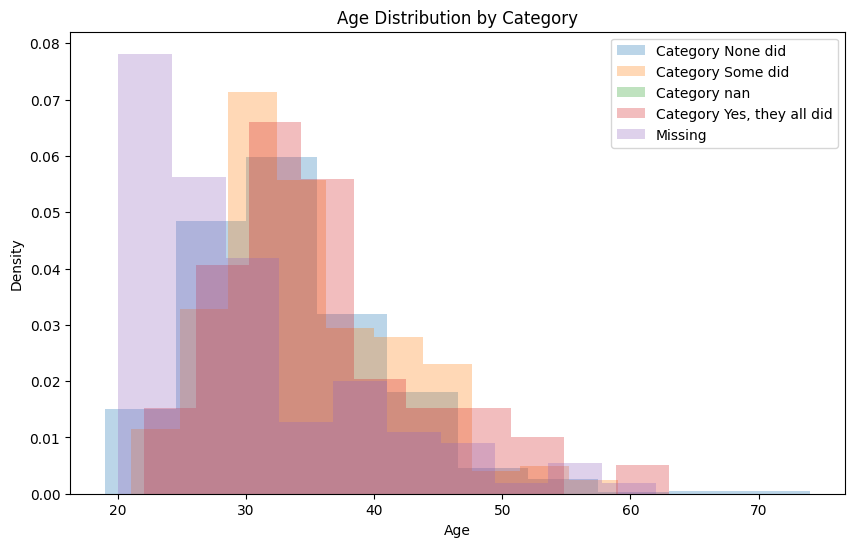

In [28]:
def analyze_categorical_missingness(data, cat_var, age_var):
    # Distribution of categories
    print("Category distribution in non-missing data:")
    print(data[cat_var].value_counts(normalize=True))
    
    # Age distribution by category
    plt.figure(figsize=(10, 6))
    for category in data[cat_var].unique():
        ages = data[data[cat_var] == category][age_var]
        plt.hist(ages, alpha=0.3, label=f'Category {category}', density=True)
    plt.hist(data[data[cat_var].isna()][age_var], 
             alpha=0.3, label='Missing', density=True)
    plt.xlabel('Age')
    plt.ylabel('Density')
    plt.legend()
    plt.title('Age Distribution by Category')
    plt.show()

analyze_categorical_missingness(dfr_cleaned, "prev_emplyrs_resources_learnMH/help", "Age")

In [30]:
group_A = [88, 92, 85, 95, 87, 90, 91, 93, 89, 94, 90, 88, 86, 92, 91]
group_B = [80, 79, 83, 82, 81, 78, 84, 77, 85, 79, 76, 82, 80, 83, 81]

med_A = np.median(group_A)
med_B = np.median(group_B)
diff_med = med_A - med_B

s, p = stats.mannwhitneyu(group_A, group_B,)
print(s, p)

224.5 3.657407119354198e-06


In [29]:
dfr_cleaned.shape
## 50 columns, 1142 records

(1142, 50)

## Dimensionality Reduction

## (Feature engineering & Selection)

## Clustering

## Validation

## Analysis & Visualisation

## TODO
Col 5
Col 28
Col 59